## Basic level

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [49]:
movies = pd.read_csv('./project-eda-imdb-data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

#### Answer:

There are 2 approaches to check on this. 
1st approach is by using DataFrame.info() method. It will not onlu show number of rows and columns but also list of the columns and their data type.

In [50]:
# Answer:
#Display details of the data (not limited only for number of Rows and columns)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


2nd approach is by using DataFrame.axes

In [51]:

#Put number of Columns and Rows into variables 
rows = len(movies.axes[0])
columns = len(movies.axes[1])

print(f'Type of Axes : {movies.axes}')
print(f'Number of rows :{rows}')
print(f'Number of columns :{columns}')

Type of Axes : [RangeIndex(start=0, stop=979, step=1), Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')]
Number of rows :979
Number of columns :6


#### Check the data type of each column.

In [52]:
# Answer: Just directly use DataFrame.info() will show the results :)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [53]:
# Answer:
#Average By Content Rating
by_cont_rating = movies.groupby(['content_rating'])['duration'].mean().reset_index().rename(columns={'duration':'average_duration'})
by_cont_rating.head()

#Average By Genre
by_genre = movies.groupby(['genre'])['duration'].mean().reset_index().rename(columns={'duration':'average_duration'})
by_genre.head()

#Overall Average Duration
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [54]:
# Answer:
#Longest Movies
movies[movies['duration'] == movies['duration'].max()].head()


,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [55]:
#Shortest Movies
movies[movies['duration'] == movies['duration'].min()].head()

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

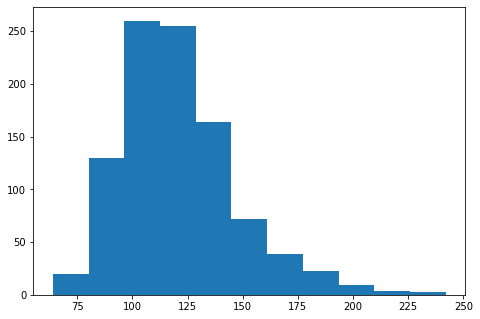

In [56]:
# Answer:

#Calculate Number of Bin using a Sturge’s rule (https://www.statology.org/sturges-rule/)
num_of_bin = int(np.ceil(np.log2(len(movies.axes[0]))) + 1)

#plot the Histogram
fig,ax = plt.subplots()
ax = fig.add_axes([0,0,1,1])
ax.hist(movies['duration'],bins=num_of_bin)
plt.show()

#### Use a box plot to display that same data.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7e58e1aca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7e58e2b280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7e58e1aa30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7e58e2b820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7e58e2baf0>],
 'means': []}

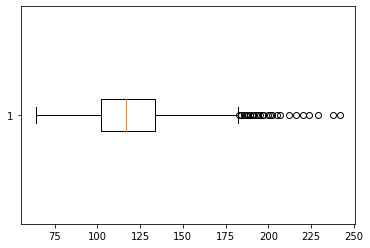

In [57]:
# Answer:
plt.boxplot(movies['duration'],vert=False)

## Intermediate level

#### Count how many movies have each of the content ratings.

In [58]:
# Answer:
count_mov_ratings = movies.groupby(['content_rating'])['title'].count().reset_index().rename(columns={'title':'movies count'})
count_mov_ratings.sort_values(by=['movies count'],ascending = False, inplace = True)
count_mov_ratings.head()

,content_rating,movies count
8,R,460
7,PG-13,189
6,PG,123
4,NOT RATED,65
0,APPROVED,47


#### Use a visualization to display that same data, including a title and x and y labels.

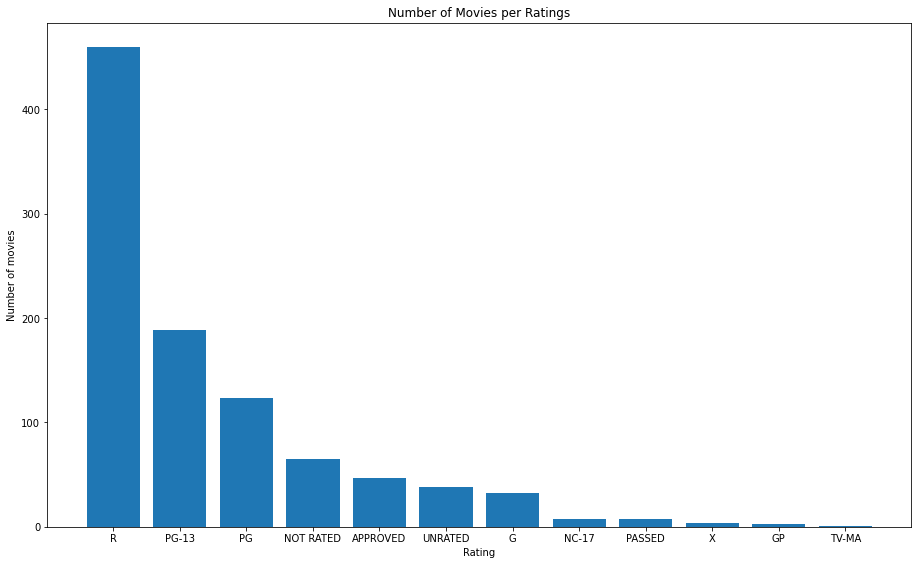

In [59]:
# Answer
fig = plt.figure(figsize = [12,7])
ax = fig.add_axes([0,0,1,1])
ax.bar(count_mov_ratings['content_rating'],count_mov_ratings['movies count'])
plt.title('Number of Movies per Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of movies')
plt.show()

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [60]:
# Answer: Merge the answers together with the next Question since both can be merged for more eficient code :)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [61]:
# Answer: 

#Create list of rate that need to be converted to UNRATED and NC_17
to_unrated = ['NOT RATED','APPROVED','PASSED','GP']
to_nc_17 = ['X','TV-MA']

#List of Condition for conversion 
conditions = [(movies['content_rating'].isin(to_unrated)),
              (movies['content_rating'].isin(to_nc_17))]

#List of Conversion Result
result = ['UNRATED','NC-17']

#Use Numpy Select to perform the conversion and put the conversion result in the new column. If the rate is not in the condition
#then set the current as is value in the new column.
movies['rating_converted'] = np.select(conditions,result,default=movies['content_rating'])

In [62]:
#Display the sample data for checking 
movies[movies['content_rating'].isin(to_unrated)].head()

,star_rating,title,content_rating,genre,duration,actors_list,rating_converted
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...",UNRATED
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...",UNRATED
22,8.7,It's a Wonderful Life,APPROVED,Drama,130,"[u'James Stewart', u'Donna Reed', u'Lionel Bar...",UNRATED
29,8.6,City Lights,PASSED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F...",UNRATED
38,8.6,Rear Window,APPROVED,Mystery,112,"[u'James Stewart', u'Grace Kelly', u'Wendell C...",UNRATED


In [63]:
#Display the sample data for checking
movies[movies['content_rating'].isin(to_nc_17)].head()

,star_rating,title,content_rating,genre,duration,actors_list,rating_converted
86,8.4,A Clockwork Orange,X,Crime,136,"[u'Malcolm McDowell', u'Patrick Magee', u'Mich...",NC-17
219,8.1,Who's Afraid of Virginia Woolf?,TV-MA,Drama,131,"[u'Elizabeth Taylor', u'Richard Burton', u'Geo...",NC-17
387,8.0,Midnight Cowboy,X,Drama,113,"[u'Dustin Hoffman', u'Jon Voight', u'Sylvia Mi...",NC-17
486,7.8,Evil Dead II,X,Comedy,84,"[u'Bruce Campbell', u'Sarah Berry', u'Dan Hicks']",NC-17
913,7.5,Suspiria,X,Horror,92,"[u'Jessica Harper', u'Stefania Casini', u'Flav...",NC-17


#### Count the number of missing values in each column.

In [64]:
#Answer : Using the DataFrame.info() we can quickly notice that some entry have na value in content_rating column.
#(this will also refelected to our newly created column, rating_converted).
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   star_rating       979 non-null    float64
 1   title             979 non-null    object 
 2   content_rating    976 non-null    object 
 3   genre             979 non-null    object 
 4   duration          979 non-null    int64  
 5   actors_list       979 non-null    object 
 6   rating_converted  976 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 53.7+ KB


In [65]:
#If we want to calculate and detect it manually, we can use the code below
#Get Number of Rows
rows = len(movies.axes[0])

#Get List of columns in the DataFrame
columns_list = movies.axes[1].tolist()

#Initialize DataFrame Structure in Dictionary
col_checks = {'Colname':[],'DataCount':[],'MissingData':[]}

#Start Calculate Number of missing values 
for col in columns_list:
    col_checks['Colname'].append(col)
    col_checks['DataCount'].append(movies[col].count())
    col_checks['MissingData'].append(rows-movies[col].count())
    
#Convert the data to DataFrame
data_stat = pd.DataFrame(col_checks)
data_stat.head()


,Colname,DataCount,MissingData
0,star_rating,979,0
1,title,979,0
2,content_rating,976,3
3,genre,979,0
4,duration,979,0


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [66]:
# Answer:
#list out rating with missing values
movies[movies['content_rating'].isna()]

,star_rating,title,content_rating,genre,duration,actors_list,rating_converted
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin...",NaN
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ...",NaN
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",NaN


In [67]:

#column that need to be replaced its value
cols = ['content_rating','rating_converted']

#Hardcoded Rating set for row with missing rating.
replace_set =  [{'index': 187, 'rating' :'PG'},
                 {'index': 649, 'rating' :'M'},
                 {'index': 936, 'rating' :'PG-13'}]

#replace the missing values
for repl in replace_set:
    for col in cols:
        movies.at[repl['index'],col]=repl['rating']
        
#Check if values already replaced.
movies.iloc[[187,649,936]]

,star_rating,title,content_rating,genre,duration,actors_list,rating_converted
187,8.2,Butch Cassidy and the Sundance Kid,PG,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin...",PG
649,7.7,Where Eagles Dare,M,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ...",M
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",PG-13


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [68]:
# Answer:
#Create column called Duration_Class which is abbreviation of Duration Classification
movies.loc[movies['duration'] >= 120, 'duration_class'] = '2hr or Longer'
movies.loc[movies['duration'] < 120, 'duration_class'] = 'Shorter than 2 hr'

In [69]:
#Caculate Average Star Rating 
avg_star_rate = movies.groupby(['duration_class'])['star_rating'].mean().reset_index().rename(columns={'star_rating':'Avg.Star Rating'})
avg_star_rate.head()

,duration_class,Avg.Star Rating
0,2hr or Longer,7.948899
1,Shorter than 2 hr,7.838667


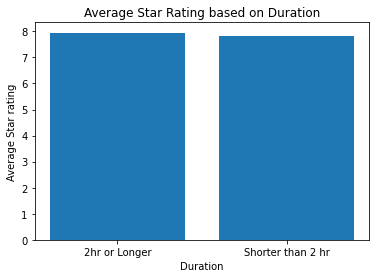

In [70]:
#Plot for Visualization
fig, ax = plt.subplots()
ax.set(
    title = 'Average Star Rating based on Duration',
    xlabel = 'Duration',
    ylabel = 'Average Star rating'
)
ax.bar(avg_star_rate['duration_class'],avg_star_rate['Avg.Star Rating'])
plt.show()

#### Use a visualization to detect whether there is a relationship between duration and star rating.

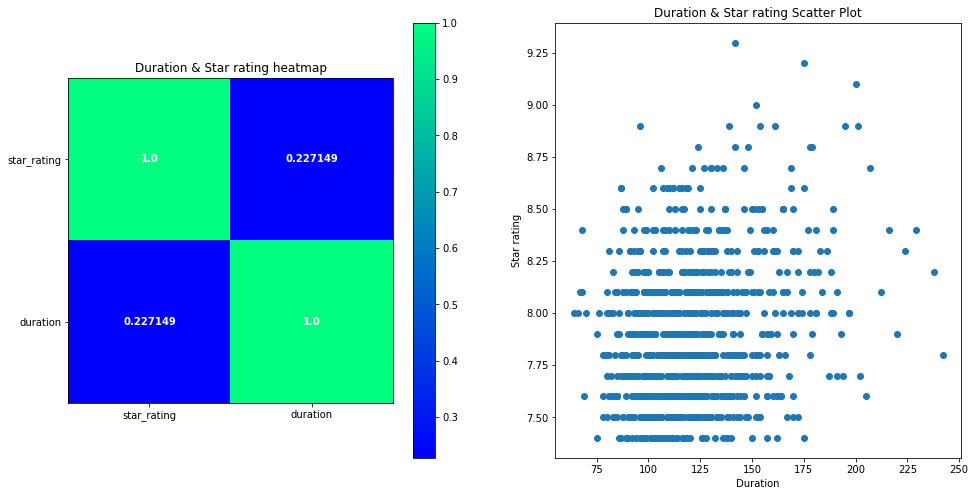

In [71]:
# Answer:

correlations = movies.corr()

#Show Correlations via Heat map
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
heatmap = ax[0].imshow(correlations,interpolation='none',cmap = plt.cm.winter)
ax[0].set_xticks(np.arange(len(correlations)), labels = correlations)
ax[0].set_yticks(np.arange(len(correlations)), labels = correlations)
ax[0].set(
    title = 'Duration & Star rating heatmap'
)
#Display correlation value inside box
for i in range(len(correlations)):
    for j in range(len(correlations)):
        ax[0].text(j,i,
                correlations.iloc[[i],[j]].to_string(header=False,index=False),
                ha='center',va='center',color='w',fontweight='bold')
plt.colorbar(heatmap,ax=ax[0])

#Show Scatter Plot for 2nd Check (although based on heatmap it's definitely not correlated anymore)
scatter = ax[1].scatter(movies['duration'].to_numpy(),movies['star_rating'].to_numpy())
ax[1].set(
    title = 'Duration & Star rating Scatter Plot'
)
ax[1].set_xlabel('Duration')
ax[1].set_ylabel('Star rating')
plt.show()


#### Calculate the average duration for each genre.

In [72]:
# Answer:
#Average By Genre
by_genre = movies.groupby(['genre'])['duration'].mean().reset_index().rename(columns={'duration':'average_duration'})
by_genre.head()

,genre,average_duration
0,Action,126.485294
1,Adventure,134.840000
2,Animation,96.596774
3,Biography,131.844156
4,Comedy,107.602564


## Advanced level

#### Visualize the relationship between content rating and duration.

In [73]:
# Answer:
#Put a weight for each content rating because we cannot get the correlation based on String
#We will based on the converted rating(rating_converted column) which we added as the new rating in the previous questions

#Create new Dataframe which list out all unique rating in the dataset.
content_rat_unique = movies['rating_converted'].unique()
content_rat_unique.sort()

#Use index as the weight
content_rat_weight = [{'content_rating': rate, 'weight':index} for index, rate in enumerate(content_rat_unique)]

#Assign the Weight
for cont_weight in content_rat_weight:
    movies.loc[movies['rating_converted'] == cont_weight['content_rating'],'rating_weight'] = cont_weight['weight']
    
#Display Sample data
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,rating_converted,duration_class,rating_weight
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",R,2hr or Longer,5.0
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",R,2hr or Longer,5.0
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",R,2hr or Longer,5.0
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",PG-13,2hr or Longer,4.0
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",R,2hr or Longer,5.0


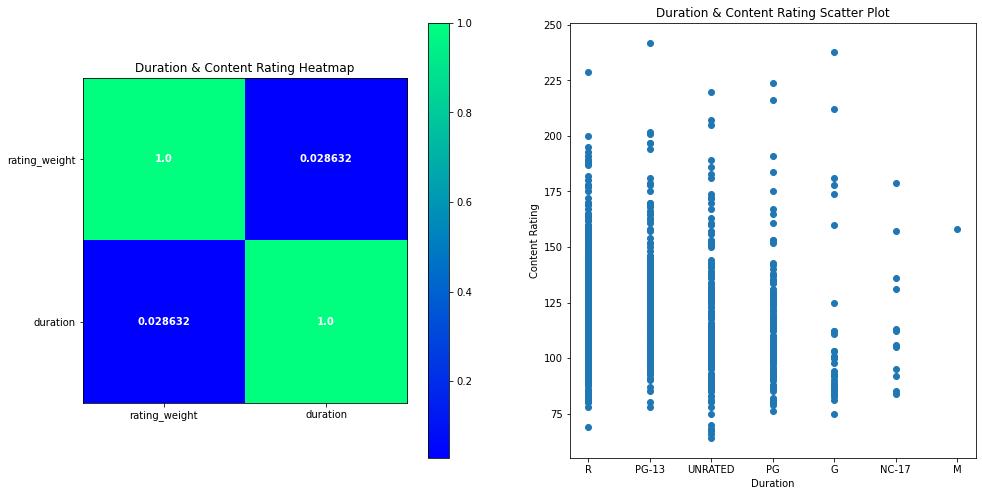

In [74]:
#Now we can correlate the data in Heatmap
correlations = movies[['rating_weight','duration']].corr()
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
heatmap = ax[0].imshow(correlations,interpolation='none',cmap = plt.cm.winter)
plt.colorbar(heatmap,ax=ax[0])
ax[0].set_xticks(np.arange(len(correlations)), labels = correlations)
ax[0].set_yticks(np.arange(len(correlations)), labels = correlations)
ax[0].set(
    title = 'Duration & Content Rating Heatmap'
)
for i in range(len(correlations)):
    for j in range(len(correlations)):
        ax[0].text(j,i,
                correlations.iloc[[i],[j]].to_string(header=False,index=False),
                ha='center',va='center',color='w',fontweight='bold')

#Show Scatter Plot. For this we can directly use Content Rating :)
scatter = ax[1].scatter(movies['rating_converted'].to_numpy(),movies['duration'].to_numpy())
ax[1].set(
    title = 'Duration & Content Rating Scatter Plot'
)
ax[1].set_xlabel('Duration')
ax[1].set_ylabel('Content Rating')
plt.show()


#### Determine the top rated movie (by star rating) for each genre.

In [75]:
# Answer:
top_rated_by_genre = movies.sort_values(by=['genre','star_rating'],ascending=[True,False])
top_rated_by_genre.drop_duplicates(subset=['genre'],inplace=True)
top_rated_by_genre.head(20)

,star_rating,title,content_rating,genre,duration,actors_list,rating_converted,duration_class,rating_weight
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",PG-13,2hr or Longer,4.0
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",PG-13,2hr or Longer,4.0
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy...",PG,2hr or Longer,3.0
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings...",R,2hr or Longer,5.0
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G...",PG-13,Shorter than 2 hr,4.0
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",R,2hr or Longer,5.0
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...",UNRATED,Shorter than 2 hr,6.0
468,7.9,E.T. the Extra-Terrestrial,PG,Family,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C...",PG,Shorter than 2 hr,3.0
638,7.7,The City of Lost Children,R,Fantasy,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ...",R,Shorter than 2 hr,5.0
105,8.3,The Third Man,NOT RATED,Film-Noir,93,"[u'Orson Welles', u'Joseph Cotten', u'Alida Va...",UNRATED,Shorter than 2 hr,6.0


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [76]:
#Check if there're any duplicates and show the title that is duplicated
if not movies['title'].is_unique:
    dupl_movies = movies[movies.duplicated(subset=['title'])] #Get the entry that duplicates
    dupl_movies = movies[movies['title'].isin(list(dupl_movies['title']))].sort_index().sort_values(by='title',ascending=True,)

dupl_movies.head(100)

,star_rating,title,content_rating,genre,duration,actors_list,rating_converted,duration_class,rating_weight
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",UNRATED,Shorter than 2 hr,6.0
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",R,2hr or Longer,5.0
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",PG-13,2hr or Longer,4.0
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",PG-13,2hr or Longer,4.0
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",R,2hr or Longer,5.0
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",R,2hr or Longer,5.0
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",PG-13,Shorter than 2 hr,4.0
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",PG-13,2hr or Longer,4.0


In [77]:
#Check if there're all these movies are actually duplicate 
if dupl_movies.duplicated:
    print('Title are duplicates but all of them are different movies')
else:
    print('There are duplicates!')

Title are duplicates but all of them are different movies


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [78]:
# Answer: 

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [79]:
# Answer:
#Get List of genre with at least 10 movies.
list_of_genre = movies['genre'].value_counts().loc[lambda x:x >= 10]

#Filtered the movies based on the Genre
movies_filtered = movies[movies['genre'].isin(list(list_of_genre.keys()))]

#Calculate Average Star Rating.
movies_filtered.groupby(['genre'])['star_rating'].mean().reset_index().rename(columns={'star_rating':'avg_star_rating'})

,genre,avg_star_rating
0,Action,7.884559
1,Adventure,7.933333
2,Animation,7.914516
3,Biography,7.862338
4,Comedy,7.822436
5,Crime,7.916935
6,Drama,7.902518
7,Horror,7.806897
8,Mystery,7.975000


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [80]:
# Answer:
#Average on all Genre first 
movies_avg_star = movies.groupby(['genre'])['star_rating'].mean().reset_index().rename(columns={'star_rating':'avg_star_rating'})

#Create Boolean Series of Genre
genre_bool = movies['genre'].value_counts() >= 10

#Sort Genre since we will use boolean keys.
genre_bool.sort_index(inplace = True)
movies_avg_star.sort_values(by='genre',ascending=True,inplace=True)

#Filter out the Genre Based on Boolean Series. Need to transform the boolean series again since both indexes are different.
movies_avg_star = movies_avg_star[pd.Series(list(genre_bool.values))]
movies_avg_star.head(10)

,genre,avg_star_rating
0,Action,7.884559
1,Adventure,7.933333
2,Animation,7.914516
3,Biography,7.862338
4,Comedy,7.822436
5,Crime,7.916935
6,Drama,7.902518
11,Horror,7.806897
12,Mystery,7.975000


#### Option 4: aggregate by count and mean, then filter using the count

In [81]:
# Answer:
movies_avg_star = movies.groupby(['genre'])['star_rating'].aggregate(['mean','count']).reset_index()
movies_avg_star = movies_avg_star[movies_avg_star['count'] >= 10]
movies_avg_star.rename(columns = {'mean':'avg_star_rating','count':'total_movies'},inplace=True)
movies_avg_star.head(100)

,genre,avg_star_rating,total_movies
0,Action,7.884559,136
1,Adventure,7.933333,75
2,Animation,7.914516,62
3,Biography,7.862338,77
4,Comedy,7.822436,156
5,Crime,7.916935,124
6,Drama,7.902518,278
11,Horror,7.806897,29
12,Mystery,7.975000,16


## Bonus

#### Figure out something "interesting" using the actors data!

#### Answer

#### Preparation : Actor Data Cleanup & Reformating

Clean actor data in original column and reformat it into list in the new column

In [82]:
#Clean actor data and put it in new column as list
movies_repl = movies.astype({'actors_list':'string'})
actors_series = movies_repl['actors_list'].str.replace('[','').str.replace(']','').str.split(',')
actors_clean_list = [{'actors_clean':[actor.strip().removeprefix('u').replace('\'','') for actor in actor_list]} for index,actor_list in actors_series.items()]
movies_repl = pd.merge(movies_repl,pd.DataFrame(actors_clean_list),left_index=True,right_index=True)

#Show data for comparison
movies_repl.head()

/var/folders/2x/_lb05ff9403b7rf4kxhw96k40000gn/T/ipykernel_10066/186698706.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,star_rating,title,content_rating,genre,duration,actors_list,rating_converted,duration_class,rating_weight,actors_clean
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",R,2hr or Longer,5.0,"[Tim Robbins, Morgan Freeman, Bob Gunton]"
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",R,2hr or Longer,5.0,"[Marlon Brando, Al Pacino, James Caan]"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",R,2hr or Longer,5.0,"[Al Pacino, Robert De Niro, Robert Duvall]"
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",PG-13,2hr or Longer,4.0,"[Christian Bale, Heath Ledger, Aaron Eckhart]"
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",R,2hr or Longer,5.0,"[John Travolta, Uma Thurman, Samuel L. Jackson]"


Break the Actors to Non List format

In [83]:
movies_repl = movies_repl.explode('actors_clean').reset_index()
movies_repl.drop(columns=['index'],inplace=True)
movies_repl.head()


,star_rating,title,content_rating,genre,duration,actors_list,rating_converted,duration_class,rating_weight,actors_clean
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",R,2hr or Longer,5.0,Tim Robbins
1,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",R,2hr or Longer,5.0,Morgan Freeman
2,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",R,2hr or Longer,5.0,Bob Gunton
3,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",R,2hr or Longer,5.0,Marlon Brando
4,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",R,2hr or Longer,5.0,Al Pacino


#### Top 10 Most popular Actors

The actors should played most movies and highest average star rating. Each of these artist will be given a score which is based on formula:  Total Movies Played x Average Star Rating of the movies they played. The high score means that the artist is popular.

In [84]:
#formulate the data 
count_movies_avg = movies_repl.groupby(['actors_clean']).agg(total_movies = ('title','count'), avg_movie_star_rating=('star_rating','mean'), min_movie_star_rating=('star_rating','min'),max_movie_star_rating=('star_rating','max')).reset_index()
count_movies_avg.sort_values(by =['total_movies'],ascending=False,inplace=True)

#At least should more than 10 movies
popular_actor = count_movies_avg.loc[count_movies_avg['total_movies'] >= 10].sort_values(by=['total_movies','avg_movie_star_rating'],ascending = [False,False]).reset_index().head(10)
popular_actor.rename(columns={'actors_clean':'actor_name'},inplace=True)
popular_actor = popular_actor.drop(['index'],axis=1)

#Score for each artist = Total Movies x Avg Movie Star Rating. Bigger means the artist is popular.
popular_actor['score'] = list(popular_actor['total_movies'].to_numpy() * popular_actor['avg_movie_star_rating'].to_numpy())
popular_actor

,actor_name,total_movies,avg_movie_star_rating,min_movie_star_rating,max_movie_star_rating,score
0,Robert De Niro,18,8.044444,7.4,9.1,144.8
1,Tom Hanks,14,8.014286,7.5,8.8,112.2
2,Clint Eastwood,14,7.942857,7.5,8.9,111.2
3,Brad Pitt,14,7.921429,7.5,8.9,110.9
4,Al Pacino,13,8.107692,7.5,9.2,105.4
5,Johnny Depp,12,7.733333,7.4,8.1,92.8
6,Leonardo DiCaprio,11,8.054545,7.5,8.8,88.6
7,Christian Bale,11,8.027273,7.6,9.0,88.3
8,Dustin Hoffman,11,7.772727,7.4,8.1,85.5
9,James Stewart,10,8.190000,7.5,8.7,81.9


#### The worst, average and best movie rating for each artist

From the previous dataset, we will be able to check each artist worst, best movie rating and it's average. We will sort the data based on the average star rating. The higher the average star rating means that the actor consistently played in a good movie :)

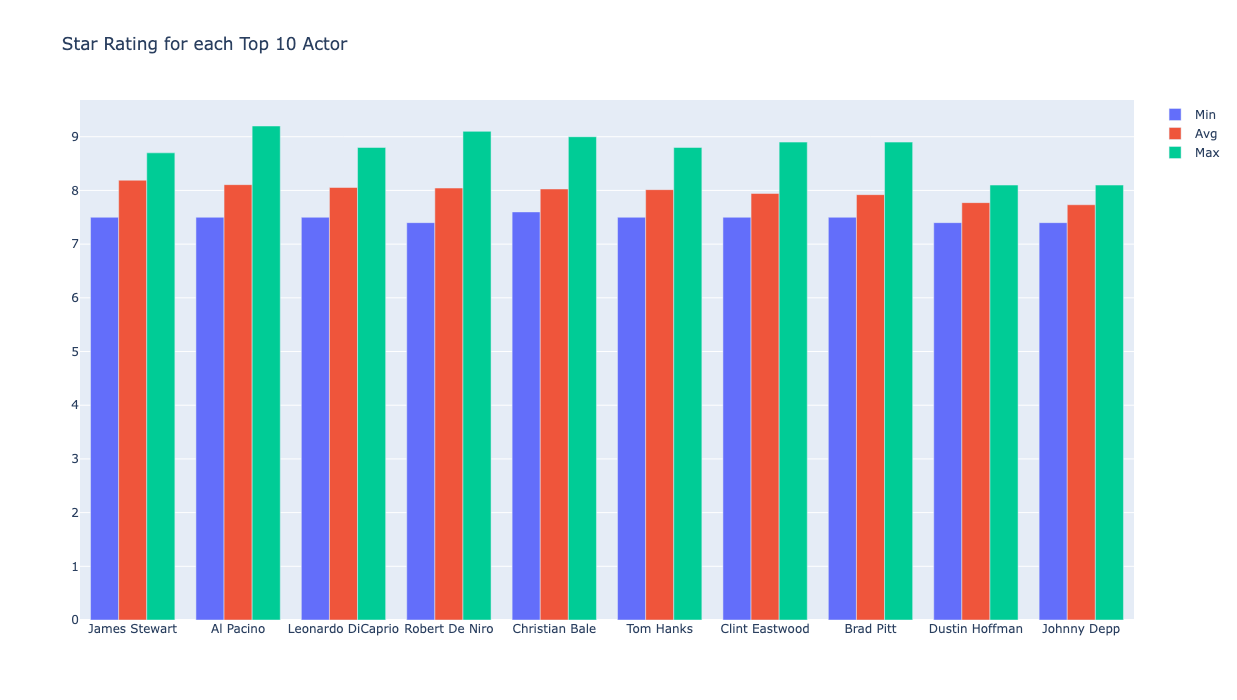

In [85]:
import plotly.graph_objects as go

popular_actor.sort_values(by='avg_movie_star_rating',ascending = False, inplace = True)

fig = go.Figure(data=[
    go.Bar(name='Min', x=popular_actor['actor_name'], y=popular_actor['min_movie_star_rating']),
    go.Bar(name='Avg', x=popular_actor['actor_name'], y=popular_actor['avg_movie_star_rating']),
    go.Bar(name='Max', x=popular_actor['actor_name'], y=popular_actor['max_movie_star_rating'])
])

fig.update_layout(barmode='group', width=1000,height=700, title='Star Rating for each Top 10 Actor')
fig.show()

#### The most Highly movie and Genre for each artist

Still on the top 10 actor, we want to know which movie and genre those actor got the highest star rating.

In [86]:
#Extract the data first.
popular_actor_genre = movies_repl[movies_repl['actors_clean'].isin(popular_actor['actor_name'].tolist())][['actors_clean','genre','star_rating','title']]
popular_actor_genre.rename(columns={'actors_clean':'actor_name'},inplace=True)
popular_actor_genre = popular_actor_genre.merge(popular_actor[['actor_name','score']],left_on='actor_name',right_on='actor_name',how='inner').reset_index()

#Sort Based on Score and Genre
popular_actor_genre.sort_values(by=['score','star_rating'],ascending=[False,False],inplace=True)
popular_actor_genre.drop_duplicates(subset=['actor_name'],inplace=True)
popular_actor_genre.head(10)


,index,actor_name,genre,star_rating,title,score
13,13,Robert De Niro,Crime,9.1,The Godfather: Part II,144.8
81,81,Tom Hanks,Drama,8.8,Forrest Gump,112.2
42,42,Clint Eastwood,Western,8.9,"The Good, the Bad and the Ugly",111.2
56,56,Brad Pitt,Drama,8.9,Fight Club,110.9
0,0,Al Pacino,Crime,9.2,The Godfather,105.4
105,105,Johnny Depp,Adventure,8.1,Pirates of the Caribbean: The Curse of the Bla...,92.8
70,70,Leonardo DiCaprio,Action,8.8,Inception,88.6
31,31,Christian Bale,Action,9.0,The Dark Knight,88.3
117,117,Dustin Hoffman,Biography,8.1,Papillon,85.5
95,95,James Stewart,Drama,8.7,It's a Wonderful Life,81.9


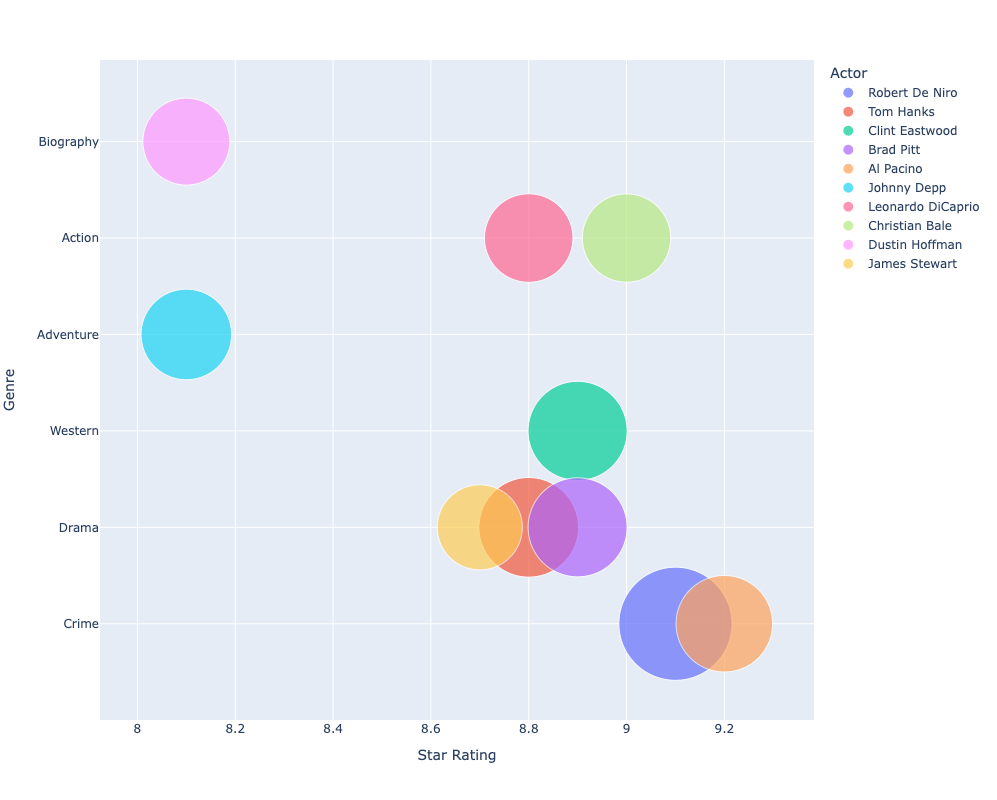

In [87]:
#Draw a scatter Plot
import plotly.express as px
fig = px.scatter(popular_actor_genre, x='star_rating', y='genre', color='actor_name',
                 size='score', hover_data=['title'],height=800,width=1000,size_max=80,
                 labels={
                     'genre': 'Genre',
                     'star_rating': "Star Rating",
                     'actor_name': 'Actor'
                 })


fig.show()


### Most played & highest rated Genre 

Lastly, from the top 10 actor, we want to know which genre each actor played the most and also having the highest average star  rating

In [88]:
most_played_genre = movies_repl[movies_repl['actors_clean'].isin(popular_actor['actor_name'].tolist())][['actors_clean','genre','star_rating']]
most_played_genre.rename(columns={'actors_clean':'actor_name'},inplace=True)
most_played_genre = most_played_genre.merge(popular_actor[['actor_name','score']],left_on='actor_name',right_on='actor_name',how='inner').reset_index()
most_played_genre = most_played_genre.groupby(['actor_name','score','genre']).agg(total_movies=('genre','count'),avg_star_rating=('star_rating','mean')).reset_index()
most_played_genre.sort_values(by=['score','total_movies','avg_star_rating'],ascending=[False,False,False],inplace=True)
most_played_genre.drop_duplicates(subset=['actor_name'],inplace=True)

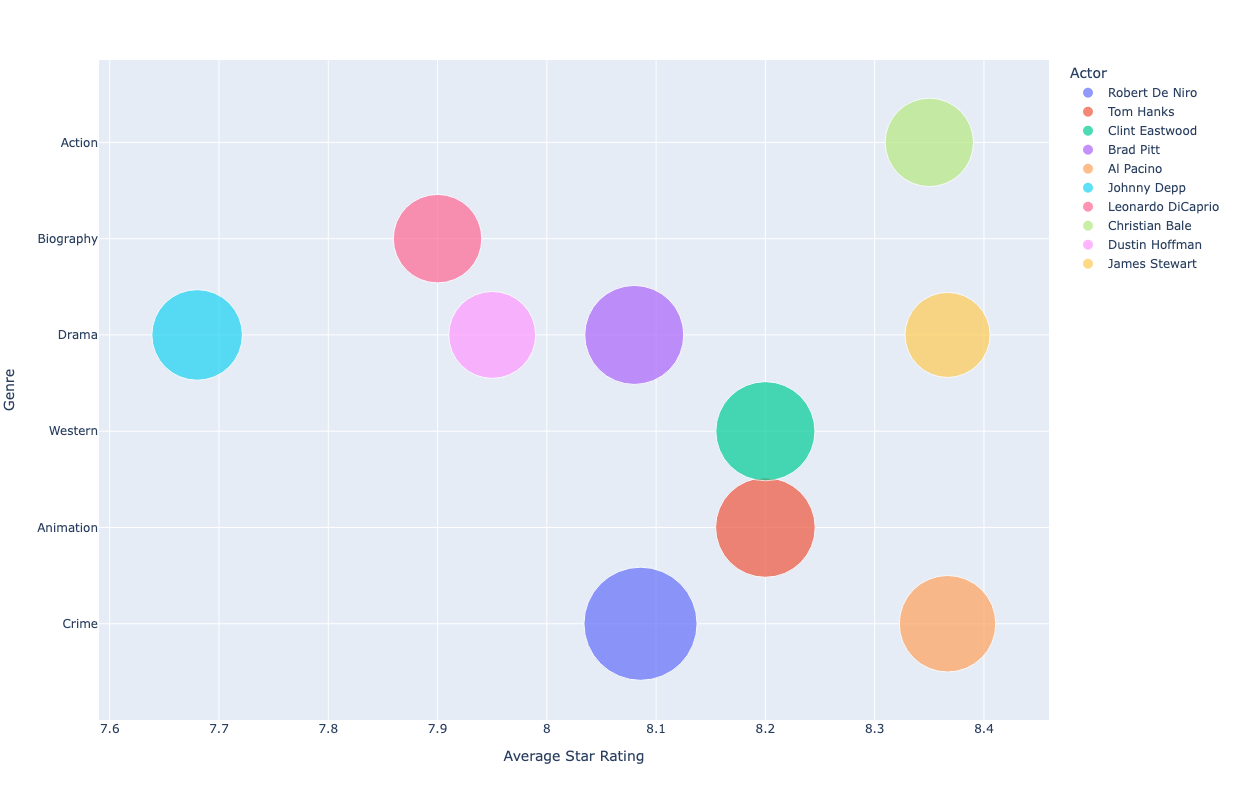

In [89]:
fig = px.scatter(most_played_genre, x='avg_star_rating', y='genre', color='actor_name',
                 size='score', hover_data=['actor_name'],height=800,width=1000,size_max=80,
                 labels={
                     'genre': 'Genre',
                     'avg_star_rating': "Average Star Rating",
                     'actor_name': 'Actor'
                 })


fig.show()